<h1 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #f0f0f0; 
    font-size: 2.5rem; 
    font-weight: bold; 
    text-align: center; 
    padding: 20px; 
    border-bottom: 3px solid #4a90e2;
    text-shadow: 1px 1px 3px rgba(0,0,0,0.5);
    background-color: #333;
    border-radius: 5px;
    ">
    Credit Card Fraud Detection 
</h1>


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Importing Necessary Libraries
</h2>


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Loading the Dataset
</h2>


In [34]:
df = pd.read_csv('./data/creditcard.csv')
print(df.shape)

(284807, 31)


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Exploring the Dataset
</h2>


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
#The Target Classes
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [38]:
class_names = {0: "Not Fraud", 1: "Fraud"}
df["Class"].value_counts().rename(index=class_names)

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64

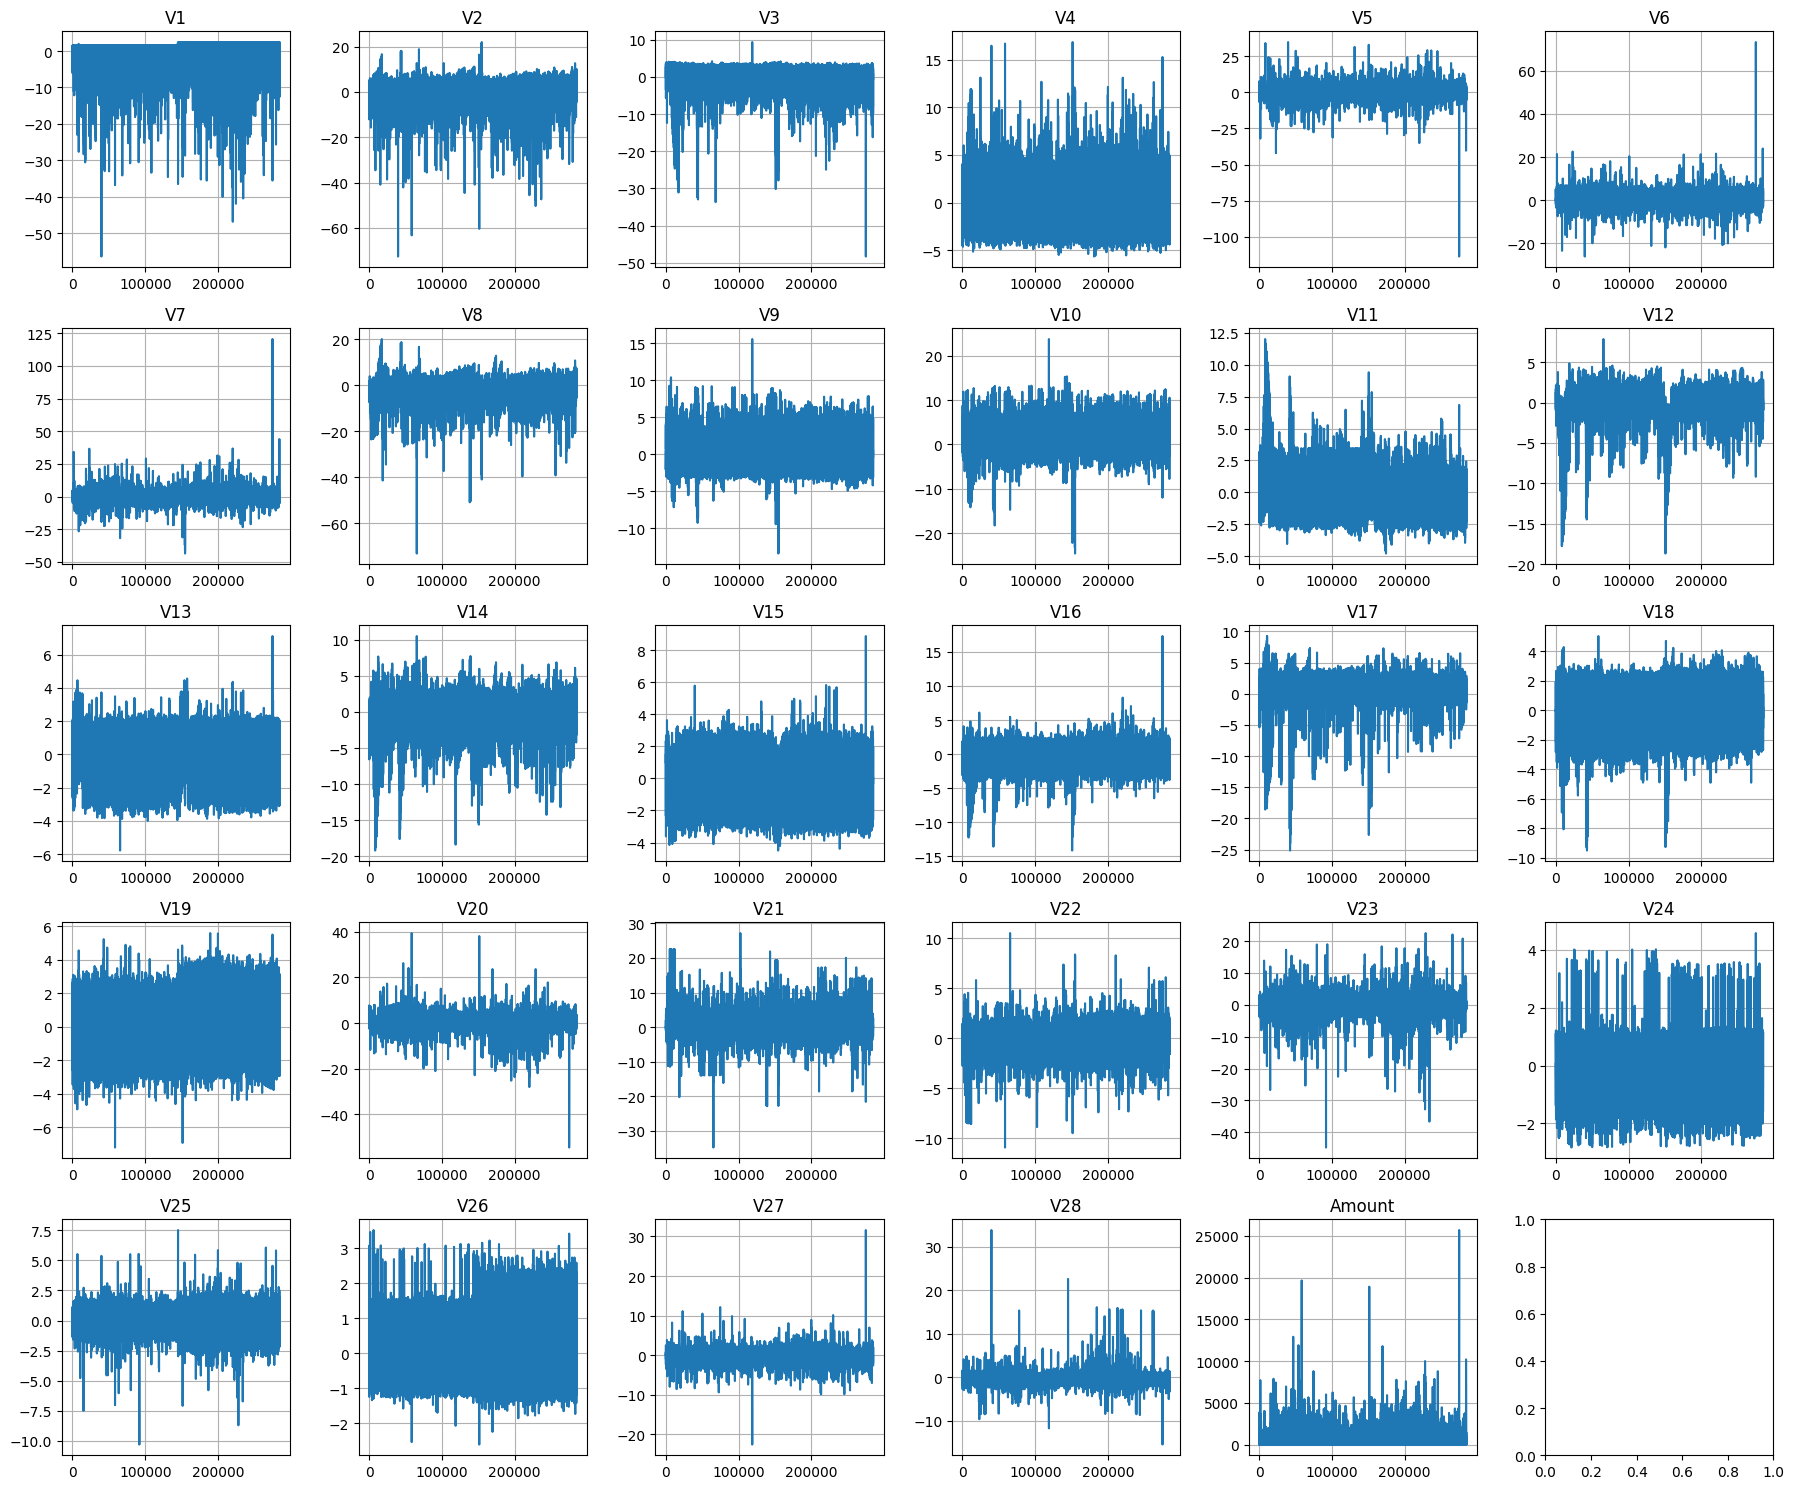

In [39]:
fig, axs = plt.subplots(5, 6, figsize=(18, 15)) 
axs = axs.flatten()

for i in range(1, 29):
    axs[i-1].plot(df[f'V{i}'])
    axs[i-1].set_title(f'V{i}')
    axs[i-1].grid(True)

axs[28].plot(df['Amount'])
axs[28].set_title('Amount')
axs[28].grid(True)

plt.tight_layout()
plt.show()


In [40]:
features = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(features)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [41]:
data_features = df[features]
data_target = df[target]

<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Data Preparation
</h2>


In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.80, test_size=0.20, random_state=1)

In [43]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13367,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
31788,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
84796,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
6243,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
162432,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,0.346951,...,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26
117583,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,-0.400162,...,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32
73349,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,-0.480985,...,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58
267336,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,0.102675,...,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80


In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Logistic Regression
</h2>


In [45]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [46]:
predictions = model.predict(X_test)

In [47]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_logistic_regression = auc(recall, precision)
print(f"AUPRC Logistic Regression: {auprc_logistic_regression:.2f}")

AUPRC Logistic Regression: 0.70


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Decision tree
</h2>

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [49]:
predictions = model.predict(X_test)

In [50]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_decision_tree = auc(recall, precision)
print(f"AUPRC Decision Tree: {auprc_decision_tree:.2f}")

AUPRC Decision Tree: 0.73


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Random Forest
</h2>

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

c:\Users\user\OneDrive\Bureau\Projects\Credit-Card-Fraud-Detection\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [52]:
predictions = model.predict(X_test)

In [53]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_random_forest = auc(recall, precision)
print(f"AUPRC Random Forest: {auprc_random_forest:.2f}")

AUPRC Random Forest: 0.85


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Gradient Boosting Machines
</h2>

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

c:\Users\user\OneDrive\Bureau\Projects\Credit-Card-Fraud-Detection\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [55]:
predictions = model.predict(X_test)

In [56]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_gradient_boosting = auc(recall, precision)
print(f"AUPRC Gradient Boosting: {auprc_gradient_boosting:.2f}")

AUPRC Gradient Boosting: 0.74


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Naive Bayes
</h2>

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


c:\Users\user\OneDrive\Bureau\Projects\Credit-Card-Fraud-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [58]:
predictions = model.predict(X_test)

In [59]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_naive_bayes = auc(recall, precision)
print(f"AUPRC Naive Bayes: {auprc_naive_bayes:.2f}")

AUPRC Naive Bayes: 0.40


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    k-Nearest Neighbors (knn)
</h2>

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

c:\Users\user\OneDrive\Bureau\Projects\Credit-Card-Fraud-Detection\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
predictions = model.predict(X_test)

In [62]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_knn = auc(recall, precision)
print(f"AUPRC KNN: {auprc_knn:.2f}")

AUPRC KNN: 0.80


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Support Vector Classifier
</h2>


In [63]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

c:\Users\user\OneDrive\Bureau\Projects\Credit-Card-Fraud-Detection\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [64]:
predictions = model.predict(X_test)

In [65]:
precision, recall, _ = precision_recall_curve(y_test, predictions)
auprc_svm = auc(recall, precision)
print(f"AUPRC Support Vector Classifier: {auprc_svm:.2f}")

AUPRC Support Vector Classifier: 0.79


<h2 style="
    font-family: 'JetBrains Mono', 'Arial', sans-serif; 
    color: #e0e0e0; 
    font-size: 1.5rem; 
    font-weight: semi-bold; 
    text-align: center; 
    margin: 10px 0; 
    padding: 10px; 
    border-bottom: 2px solid #6c63ff;
    ">
    Conclusion
</h2>

In [72]:
print("In this project, AUPRC (Area Under the Precision-Recall Curve) was chosen as the evaluation metric due to the unbalanced nature of the credit card fraud detection dataset, where the non-fraud class significantly outweighs the fraud class.")

In this project, AUPRC (Area Under the Precision-Recall Curve) was chosen as the evaluation metric due to the unbalanced nature of the credit card fraud detection dataset, where the non-fraud class significantly outweighs the fraud class.


In [71]:
model_names = ["KNN", "Logistic Regression", "Decision Tree", "Gradient Boosting", "Naive Bayes", "Random Forest", "SVM"]
auprc_values = [auprc_knn, auprc_logistic_regression, auprc_decision_tree, auprc_gradient_boosting, auprc_naive_bayes, auprc_random_forest, auprc_svm]

auprc_df = pd.DataFrame({
    "Model": model_names,
    "AUPRC": auprc_values
})

# Print the DataFrame
print(auprc_df)

# Conclusion
best_model_index = auprc_values.index(max(auprc_values))
best_model = model_names[best_model_index]
best_model_auprc = max(auprc_values)

conclusion = f"The model with the highest AUPRC is {best_model} with an AUPRC of {best_model_auprc:.4f}. Random Forest performs the best in terms of handling the precision-recall trade-off in this dataset, followed by KNN and SVM. Naive Bayes has the lowest AUPRC, indicating it performs the worst among the models evaluated."

print("\nConclusion:\n", conclusion)


                 Model     AUPRC
0                  KNN  0.799610
1  Logistic Regression  0.697197
2        Decision Tree  0.732053
3    Gradient Boosting  0.739450
4          Naive Bayes  0.399167
5        Random Forest  0.850511
6                  SVM  0.790511

Conclusion:
 The model with the highest AUPRC is Random Forest with an AUPRC of 0.8505. Random Forest performs the best in terms of handling the precision-recall trade-off in this dataset, followed by KNN and SVM. Naive Bayes has the lowest AUPRC, indicating it performs the worst among the models evaluated.
